In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
from jwave.extras.engine import Matlab

In [5]:
mlb = Matlab("/home/antonio/repos/k-wave-matlab", "/home/antonio/repos/off-grid-sources")
mlb.start()

Connecting to Matlab session MATLAB_142842


In [6]:
!pwd

/home/antonio/repos/jwave/docs/notebooks/intercomparison


In [7]:
mlb.run_script("/home/antonio/repos/jwave/docs/notebooks/intercomparison/PH1_BM1_MP1_SC1_JWAVE.m")

In [8]:
src_field = mlb.get("src_field")

In [9]:
src_field = np.array(src_field).astype(np.complex64)

In [10]:
src_field.shape

(256, 196, 196)

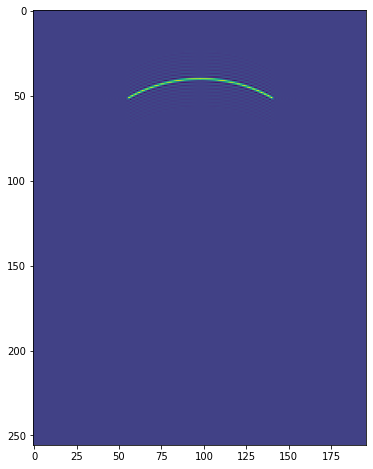

In [11]:
plt.figure(figsize=(8,8))
plt.imshow(src_field[:,:,98].real)

In [12]:
src_field.dtype

dtype('complex64')

In [13]:
# Getting properties
N = src_field.shape
dx = tuple([mlb.get("dx")]*3)
omega = 2*np.pi*mlb.get("source_f0")

In [14]:
from jwave.acoustics.time_harmonic import ongrid_helmholtz_solver_verbose
from jwave.geometry import Domain, Medium, _circ_mask
from jax import numpy as jnp

In [15]:
# Making geometry
domain = Domain(N, dx)

# Setup medium 
sound_speed = np.ones(N)*1500.

medium = Medium(
    domain=domain,
    sound_speed=sound_speed,
    density=1.,
    attenuation=None,
    pml_size=10
)

In [16]:
def setup_simulation(medium, solver="gmres"):
    params, solver = ongrid_helmholtz_solver_verbose(
        medium, 
        omega=omega,
        tol=0.001, 
        restart=2,
        method=solver,
        maxiter=100,
        source = src_field,
    )
    return params, solver

In [17]:
params, solver = setup_simulation(medium, "gmres")
field = solver(params)

2022-01-10 09:52:39.465853: E external/org_tensorflow/tensorflow/compiler/xla/pjrt/pjrt_stream_executor_client.cc:2085] Execution of replica 0 failed: INTERNAL: Failed to load in-memory CUBIN: CUDA_ERROR_OUT_OF_MEMORY: out of memory


RuntimeError: INTERNAL: Failed to load in-memory CUBIN: CUDA_ERROR_OUT_OF_MEMORY: out of memory